
Cluster 0:
unlabeled_cell_01426.tiff, unlabeled_cell_01467.tiff, unlabeled_cell_01430.tiff, unlabeled_cell_01447.tiff, unlabeled_cell_01386.tiff, unlabeled_cell_01410.tiff, unlabeled_cell_01390.tiff, unlabeled_cell_01406.tiff, unlabeled_cell_01451.tiff, unlabeled_cell_01450.tiff, unlabeled_cell_01407.tiff, unlabeled_cell_01391.tiff, unlabeled_cell_01411.tiff

Cluster 1:
unlabeled_cell_01652.png, unlabeled_cell_01646.png, unlabeled_cell_01691.png, unlabeled_cell_01685.png, unlabeled_cell_01684.png, unlabeled_cell_01690.png, unlabeled_cell_01647.png, unlabeled_cell_01653.png, unlabeled_cell_01679.png, unlabeled_cell_01645.png, unlabeled_cell_01651.png, unlabeled_cell_01686.png, unlabeled_cell_01692.png, unlabeled_cell_01693.png, unlabeled_cell_01687.png, unlabeled_cell_01650.png, unlabeled_cell_01644.png, unlabeled_cell_01678.png, unlabeled_cell_01640.png, unlabeled_cell_01654.png, unlabeled_cell_01668.png, unlabeled_cell_01683.png, unlabeled_cell_01697.png, unlabeled_cell_01708.png

Cl

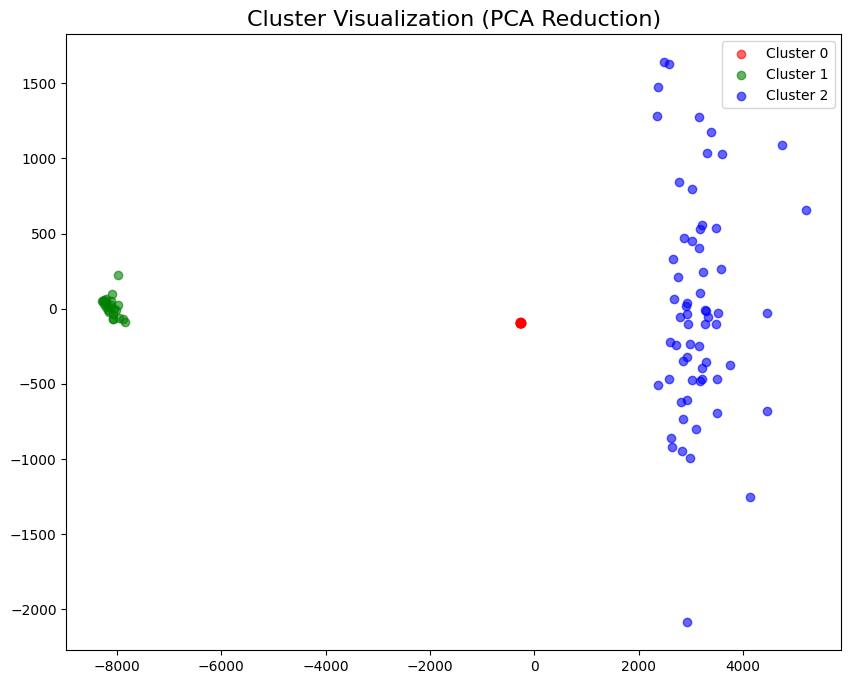

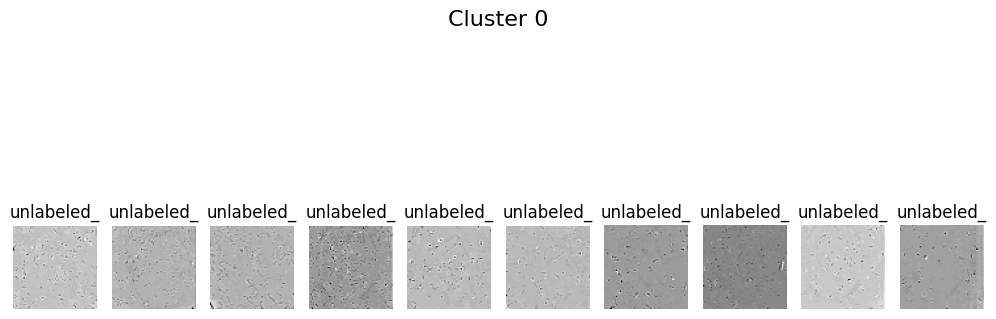

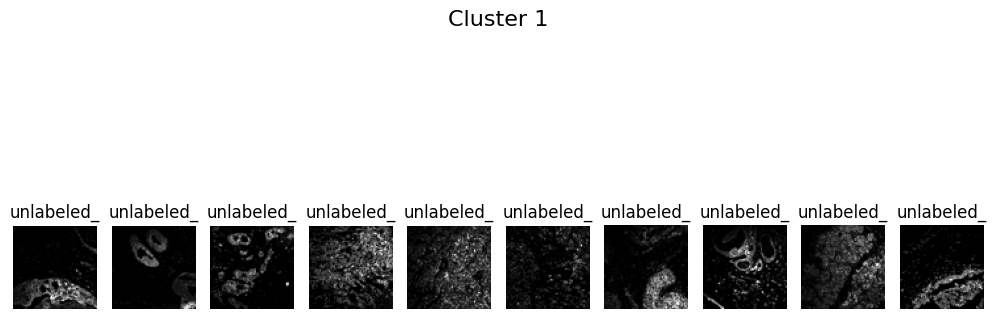

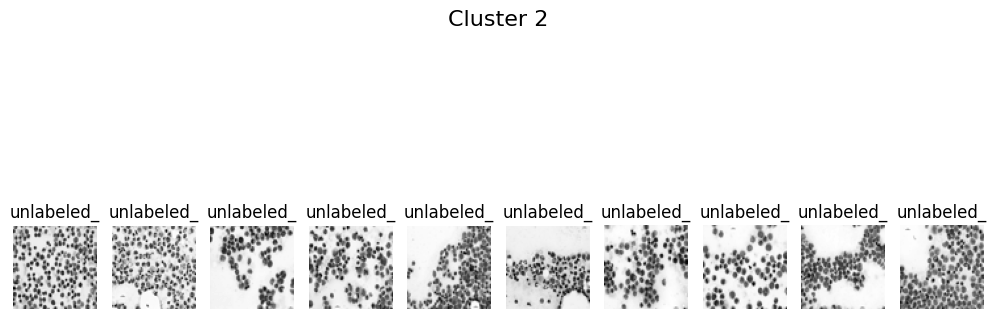

In [2]:
import os
import numpy as np
from PIL import Image, UnidentifiedImageError
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Configurazione
image_folder = "final"  # Cartella delle immagini
output_dir = 'risultati'  # Cartella di output
max_images = 100  # Numero massimo di immagini da analizzare
num_clusters = 3  # Numero di cluster da trovare
min_images_per_cluster = 10  # Numero di immagini da visualizzare per ciascun cluster

# Crea la cartella 'risultati' se non esiste
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Caricamento immagini
images = []
image_files = []

for file in os.listdir(image_folder):
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        try:
            img_path = os.path.join(image_folder, file)
            img = Image.open(img_path).convert('L').resize((64, 64))  # Scala di grigi e ridimensiona
            img_array = np.array(img).flatten()  # Appiattisci l'immagine
            images.append(img_array)
            image_files.append(file)
        except (OSError, UnidentifiedImageError) as e:
            print(f"Errore con l'immagine {file}: {e}")
        if len(images) >= max_images:
            break  # Limita al massimo numero di immagini

if len(images) == 0:
    raise ValueError("Non ci sono immagini valide nel dataset!")

images = np.array(images)

# K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(images)

# Visualizza i risultati
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    cluster_images = [image_files[i] for i in range(len(labels)) if labels[i] == cluster]
    print(", ".join(cluster_images))

# Visualizza i grafici di dispersione per i cluster
def plot_cluster_scatter(images, labels, num_clusters):
    # Riduci le immagini a 2D per la visualizzazione della dispersione
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    reduced_images = pca.fit_transform(images)

    plt.figure(figsize=(10, 8))
    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    for cluster in range(num_clusters):
        cluster_indices = [i for i in range(len(labels)) if labels[i] == cluster]
        plt.scatter(reduced_images[cluster_indices, 0], reduced_images[cluster_indices, 1], 
                    label=f'Cluster {cluster}', color=colors[cluster % len(colors)], alpha=0.6)

    plt.title("Cluster Visualization (PCA Reduction)", fontsize=16)
    plt.legend()
    plt.savefig(os.path.join(output_dir, 'cellule_pca.png'))
    plt.show()

plot_cluster_scatter(images, labels, num_clusters)

# Visualizza miniature per ogni cluster (limitato a min_images_per_cluster per cluster)
def plot_clusters(images, labels, image_files, num_clusters, min_images_per_cluster):
    for cluster in range(num_clusters):
        cluster_indices = [i for i in range(len(labels)) if labels[i] == cluster]
        cluster_images = [images[i] for i in cluster_indices]
        cluster_files = [image_files[i] for i in cluster_indices]

        plt.figure(figsize=(10, 5))
        plt.suptitle(f"Cluster {cluster}", fontsize=16)

        # Limita a min_images_per_cluster immagini per cluster
        for j, img_array in enumerate(cluster_images[:min_images_per_cluster]):
            plt.subplot(1, min_images_per_cluster, j + 1)  # 1 riga, 'min_images_per_cluster' colonne
            img = img_array.reshape(64, 64)  # Ricostruisci immagine 64x64
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            plt.title(cluster_files[j][:10])  # Mostra il nome file troncato (fino ai primi 10 caratteri)
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'cluster_{cluster}_images.png'))
        plt.show()

plot_clusters(images, labels, image_files, num_clusters, min_images_per_cluster)